## Importing Libraries

In [1]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import numpy as np
import pandas as pd
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import style
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing, svm, metrics
import math
from keras import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import xgboost as xgb

## Importing Data and Finalizing X (Feature Set) and Y (Outout Set)

In [2]:
data = pd.read_csv('./miningdata.csv', index_col=False)
data.head()

,Unnamed: 0,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Floatation Column Air Flow Mean,Floatation Column Air Flow Median,Floatation Column Level Mean,Floatation Column Level Median,% Iron Concentrate,% Silica Concentrate
0,0,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,265.090000,250.884,461.548429,446.370,66.91,1.31
1,1,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,264.534286,250.532,457.548000,448.086,66.91,1.31
2,2,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,264.120000,250.313,456.467000,451.240,66.91,1.31
3,3,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,265.359714,251.147,448.064429,446.210,66.91,1.31
4,4,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,264.663000,250.203,448.784714,452.441,66.91,1.31


In [3]:
X = data[['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow', 'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density', 'Floatation Column Air Flow Mean', 'Floatation Column Air Flow Median', 'Floatation Column Level Mean', 'Floatation Column Level Median']]
X.head()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Floatation Column Air Flow Mean,Floatation Column Air Flow Median,Floatation Column Level Mean,Floatation Column Level Median
0,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,265.090000,250.884,461.548429,446.370
1,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,264.534286,250.532,457.548000,448.086
2,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,264.120000,250.313,456.467000,451.240
3,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,265.359714,251.147,448.064429,446.210
4,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,264.663000,250.203,448.784714,452.441


In [4]:
Y = data[['% Silica Concentrate']]
Y.head()

,% Silica Concentrate
0,1.31
1,1.31
2,1.31
3,1.31
4,1.31


In [5]:
def normalize_x(X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11):
    Z = []
    x1min, x2min, x3min, x4min, x5min, x6min, x7min, x8min, x9min, x10min, x11min = np.amin(X1), np.amin(X2), np.amin(X3), np.amin(X4), np.amin(X5), np.amin(X6), np.amin(X7), np.amin(X8), np.amin(X9), np.amin(X10), np.amin(X11)
    x1max, x2max, x3max, x4max, x5max, x6max, x7max, x8max, x9max, x10max, x11max = np.amax(X1), np.amax(X2), np.amax(X3), np.amax(X4), np.amax(X5), np.amax(X6), np.amax(X7), np.amax(X8), np.amax(X9), np.amax(X10), np.amax(X11)
    d1, d2, d3, d4, d5, d6, d7, d8, d9, d10, d11 = x1max-x1min, x2max-x2min, x3max-x3min, x4max-x4min, x5max-x5min, x6max-x6min, x7max-x7min, x8max-x8min, x9max-x9min, x10max-x10min, x11max-x11min
    for i in range(len(X1)):
        q1 = (X1[i] - x1min)/d1
        q2 = (X2[i] - x2min)/d2
        q3 = (X3[i] - x3min)/d3
        q4 = (X4[i] - x4min)/d4
        q5 = (X5[i] - x5min)/d5
        q6 = (X6[i] - x6min)/d6
        q7 = (X7[i] - x7min)/d7
        q8 = (X8[i] - x8min)/d8
        q9 = (X9[i] - x9min)/d9
        q10 = (X10[i] - x10min)/d10
        q11 = (X11[i] - x11min)/d11
        Z.append([q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11])
    return Z

In [6]:
Xn = normalize_x(X[['% Iron Feed'][0]], X[['% Silica Feed'][0]], X[['Starch Flow'][0]], X[['Amina Flow'][0]], X[['Ore Pulp Flow'][0]], X[['Ore Pulp pH'][0]], X[['Ore Pulp Density'][0]], X[['Floatation Column Air Flow Mean'][0]], X[['Floatation Column Air Flow Median'][0]], X[['Floatation Column Level Mean'][0]], X[['Floatation Column Level Median'][0]])
print(Xn[0:5])

[[0.5407986111111112, 0.488314116547211, 0.47927281147315975, 0.6342331014785013, 0.4591432345725609, 0.6390332690922542, 0.6603484989353087, 0.41620083876360986, 0.40352078254717494, 0.42015645510365124, 0.5160579785714697], [0.5407986111111112, 0.488314116547211, 0.48004738661871127, 0.6473510100046398, 0.498537459898093, 0.6394226089664974, 0.6603484989353087, 0.41124086257384707, 0.4012581092623228, 0.41200272951110245, 0.5193475972939244], [0.5407986111111112, 0.488314116547211, 0.48307108672583365, 0.6555640138269303, 0.5524391394602751, 0.6398119488407406, 0.6603484989353087, 0.40754319394908806, 0.3998503665083946, 0.4097994212384596, 0.5253939011695784], [0.5407986111111112, 0.488314116547211, 0.4836901119446146, 0.6567912442831346, 0.5116531421022834, 0.640249956199264, 0.6603484989353087, 0.4186081485441429, 0.40521135946170955, 0.3926731907666339, 0.5157512542150636], [0.5407986111111112, 0.488314116547211, 0.4815203491905798, 0.6357053763138497, 0.5662625023589356, 0.64063

In [7]:
def normalize_y(Y):
    Z = []
    ymin = np.amin(Y)
    ymax = np.amax(Y)
    d = ymax - ymin
    for i in range(len(Y)):
        Z.append((Y[i] - ymin)/d)
    return Z

In [8]:
Yn = normalize_y(Y[['% Silica Concentrate'][0]])
print(Yn[0:5])

[0.14401622718052737, 0.14401622718052737, 0.14401622718052737, 0.14401622718052737, 0.14401622718052737]


In [9]:
X_train, X_test, Y_train, Y_test =  train_test_split(Xn, Yn, test_size=0.20, shuffle=True)

## Training and Testing eXtreme Gradient Boost(XGB) Model 

In [10]:
xgbr = xgb.XGBRegressor()
xgbr.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [11]:
Ymax = np.amax(Y[['% Silica Concentrate'][0]]) 
Ymin = np.amin(Y[['% Silica Concentrate'][0]])
D = Ymax - Ymin

In [12]:
def rev_normalize(pr):
    Z = []
    for i in range(len(pr)):
        Z.append((pr[i]*D)+Ymin)
    Z = np.asarray(Z)
    return Z

In [13]:
import sklearn.metrics as metrics

p = xgbr.predict(X_test)
P = rev_normalize(p)

yt = rev_normalize(Y_test)

# Accuracy evaluation
A = sklearn.metrics.mean_absolute_error(Y_test, p)           # Best possibe result would be 0.0
print("Accuracy is:", A)

np.set_printoptions(suppress=True)

# Printing results
print("Predictions:")
print(P[0:20])
print("Expected values:")
print(yt[0:20])

Accuracy is: 0.08982259334461004
Predictions:
[1.72653825 2.57225612 1.63343218 2.67218232 1.79520496 2.62070464
 1.7581818  4.75809013 3.95575669 2.49132444 1.50639735 1.78997456
 2.00460553 1.9496084  2.7509182  2.23512642 2.21340085 3.14857972
 3.19847266 2.42152192]
Expected values:
[1.16 2.78 1.14 3.27 1.8  3.12 1.21 4.96 4.39 2.94 1.8  1.41 1.06 1.62
 3.11 2.42 3.22 3.58 5.05 1.3 ]


## Plotting some results

<Figure size 2160x1440 with 0 Axes>

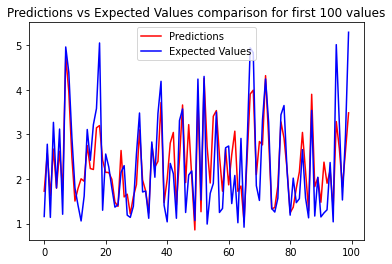

<Figure size 2160x1440 with 0 Axes>

In [15]:
L = range(100)
ylabels = []
for i in range(math.floor(np.amin(yt)-3),math.ceil(np.amax(yt)+3),1):
    ylabels.append(i)
plt.yticks(ylabels,ylabels)
plt.plot(L, P[0:100], 'r', label="Predictions")
plt.plot(L, yt[0:100], 'b', label="Expected Values")
plt.title('Predictions vs Expected Values comparison for first 100 values')
plt.legend(loc='best')
plt.figure(figsize=(30,20))

<Figure size 2160x1440 with 0 Axes>

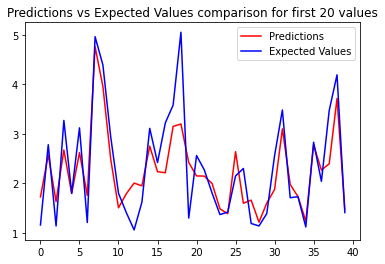

<Figure size 2160x1440 with 0 Axes>

In [16]:
L = range(40)
ylabels = []
for i in range(math.floor(np.amin(yt)-3),math.ceil(np.amax(yt)+3),1):
    ylabels.append(i)
plt.yticks(ylabels,ylabels)
plt.plot(L, P[0:40], 'r', label="Predictions")
plt.plot(L, yt[0:40], 'b', label="Expected Values")
plt.title('Predictions vs Expected Values comparison for first 20 values')
plt.legend(loc='best')
plt.figure(figsize=(30,20))